## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [101]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [102]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-05-23 22:21:51--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 142.251.111.102, 142.251.111.138, 142.251.111.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.111.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-05-23 22:21:51--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M

In [103]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [104]:
data_df['date'] = data_df['date'].str.replace('T000000', '')                                         # Remove T000000 part from data column. Hint: search about .str.replace() method. :)
data_array = data_df.drop(columns=['id', 'date']).to_numpy()
data_array = data_df.drop(columns=['id']).to_numpy()                                             # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [106]:
if 'date' in data_df.columns:
  data_df['date'] = pd.to_datetime(data_df['date'])
numerical_df = data_df.select_dtypes(include=[np.number])

# Select numeric columns only
numerical_df = data_df.select_dtypes(include=[np.number])
# Drop unnecessary columns and convert to numpy array
data_array = numerical_df.drop(columns=['id']).to_numpy()

mean = np.mean(data_array, axis=0)                                # this should be an array, each entry should be mean of a column
sd = np.std(data_array, axis=0)                                    # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 19)


The last step is to make train and test dataset and to create seperate vector for price

In [107]:
labels = data_df['price']                                                                                                           # extract the price column from data
#Index of the 'price' column (assuming it's the last column)
price_column_index = data_array_norm.shape[1] - 1

# Delete the 'price' column
x_array_norm = np.delete(data_array_norm, price_column_index, axis=1)  # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 18) (3242, 18) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [138]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_pred - y_true) ** 2)                      # fill code here

  return mse

In [109]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(a,x)+b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [110]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  da = np.dot(x.T, (yp - y_true)) / m    #dz=a-y || da=dz*x^T          # write code to calculate derivative of loss with respect to a
  db = np.sum(yp - y_true,axis=1,keepdims=True)                      # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [132]:
def gradient_descent(x, y_true, learning_rate=0.01, epochs=10):
    """
    This function performs gradient descent and minimizes loss.

    Inputs:
    x: [array] the feature vector of shape (m, n)
    y_true: [array] ground truth of shape (m,)
    learning_rate: [float] learning rate for gradient descent (default: 0.01)
    epochs: [int] number of epochs for training (default: 10)

    Outputs:
    loss: [array] of size (epochs,)
    weights: [tuple] (a, b)
    """
    m, n = x.shape
    loss_mse = []  # initialize empty list to store loss
    a = np.zeros(n)  # initialize weights 'a'
    b = 0  # initialize bias 'b'

    for epoch in range(epochs):
        # Calculate predictions
        y_pred = np.dot(x, a) + b

        # Calculate derivative of loss with respect to 'a' and 'b'
        grad_a = (-2 / m) * np.dot(x.T, (y_true - y_pred))
        grad_b = (-2 / m) * np.sum(y_true - y_pred)

        # Update weights and bias
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b

        # Calculate mean squared error (MSE)
        mse = np.mean((y_true - y_pred)**2)
        loss_mse.append(mse)

        print(f"Epoch {epoch + 1} completed! Loss = {mse}")

    print("Training completed!")

    assert a.shape == (n,)

    return loss_mse, (a, b)

### **Training**

In [135]:
# Fill in the missing parts with your specific values
epochs = 100  # tweak this!!!
learn_rate = 0.01  # choose learning rate wisely otherwise loss may diverge!!

# Assuming x and y_true are defined somewhere
train_loss, (a, b) = gradient_descent(x, y_true, learning_rate=learn_rate, epochs=epochs)

Epoch 1 completed! Loss = 0.4594466797402562
Epoch 2 completed! Loss = 0.4062747504632666
Epoch 3 completed! Loss = 0.36072682058458816
Epoch 4 completed! Loss = 0.32170536492657764
Epoch 5 completed! Loss = 0.28827087160975423
Epoch 6 completed! Loss = 0.2596190924172223
Epoch 7 completed! Loss = 0.2350615684910574
Epoch 8 completed! Loss = 0.21400895980147033
Epoch 9 completed! Loss = 0.19595677472133272
Epoch 10 completed! Loss = 0.18047315415582904
Epoch 11 completed! Loss = 0.16718841442688753
Epoch 12 completed! Loss = 0.15578609569928856
Epoch 13 completed! Loss = 0.14599529919118295
Epoch 14 completed! Loss = 0.13758412761893668
Epoch 15 completed! Loss = 0.13035407004040853
Epoch 16 completed! Loss = 0.12413519512883901
Epoch 17 completed! Loss = 0.1187820364852165
Epoch 18 completed! Loss = 0.11417007035430382
Epoch 19 completed! Loss = 0.11019270045422754
Epoch 20 completed! Loss = 0.10675867690899729
Epoch 21 completed! Loss = 0.10378988678487962
Epoch 22 completed! Loss = 

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data = 68.77066045915551


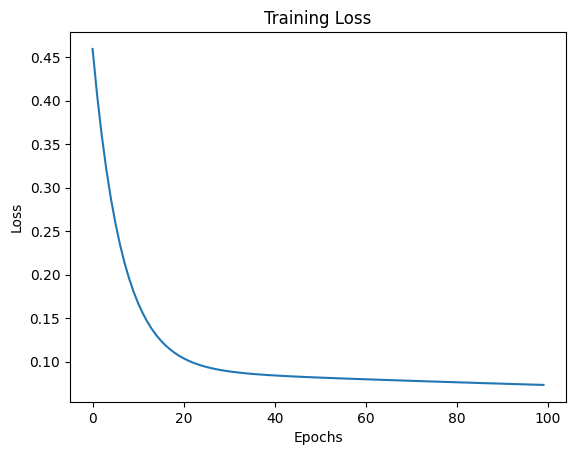

In [140]:
# Calculate predictions on test data
x_test = np.random.rand(20, n) * 10
y_pred_test = np.dot(x_test, a) + b

# Calculate loss on test data
y_test = 2 * x_test[:, 0] + 1 + np.random.randn(20) * 2
test_loss = np.mean((y_test - y_pred_test)**2)

print("Loss on test data =", test_loss)

# Visualization of loss
plt.plot(range(epochs), train_loss)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [1]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [83]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 4       3       5       4       5       

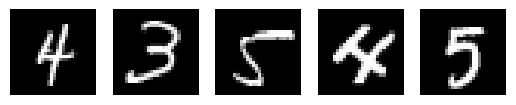

In [77]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [84]:
# Flatten the images into 1-d vectors
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

# Convert y_train to a NumPy array if it isn't already
y_train = np.asarray(y_train)

# Divide the training data into training and validation data
n_validation = 10000  # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]

# Check the lengths to ensure they match
print(len(x_train_flatten), len(y_train))



50000 50000


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary
print(len(x_train_flatten), len(y_train))


50000 50000


#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [90]:
model.compile(optimizer="adam",loss = "MSE",metrics=["accuracy"])

n_epochs = 4              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten, y_train, epochs=n_epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/4
79/79 [==============================] - 3s 17ms/step - loss: 20.2817 - accuracy: 0.0983 - val_loss: 20.3948 - val_accuracy: 0.0991
Epoch 2/4
79/79 [==============================] - 1s 14ms/step - loss: 20.2811 - accuracy: 0.0984 - val_loss: 20.3948 - val_accuracy: 0.0991
Epoch 3/4
79/79 [==============================] - 1s 14ms/step - loss: 20.2810 - accuracy: 0.0983 - val_loss: 20.3948 - val_accuracy: 0.0991
Epoch 4/4
79/79 [==============================] - 1s 14ms/step - loss: 20.2809 - accuracy: 0.0983 - val_loss: 20.3948 - val_accuracy: 0.0991


### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 [==============================] - 1s 2ms/step - loss: 20.2422 - accuracy: 0.0980
Loss =  20.24220085144043
Accuracy =  9.799999743700027 %


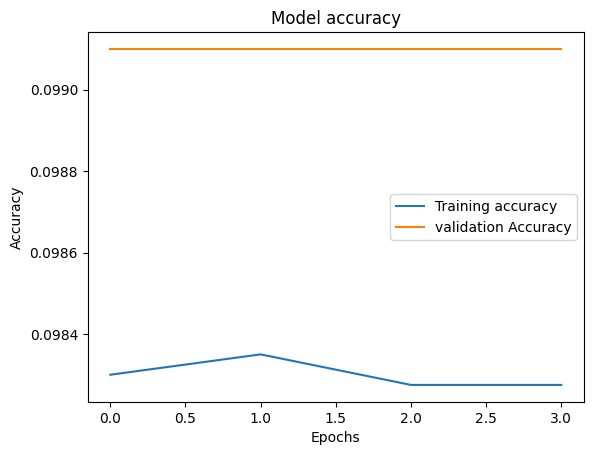

Ellipsis

In [91]:
results = model.evaluate(x_test_flatten,y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
...


Lets show our results on images from testing dataset

Labels: 
3      1      4      9      9      1      4      4      5      1      

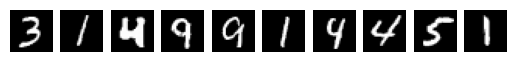

Predicted values: 
1/1 [==============================] - 0s 24ms/step
0 

In [100]:
n = 10  # number of images to see predictions on

index = np.random.choice(x_test.shape[0], n)  # choose random index from test data
print("Labels: ")

for i, ind in enumerate(index):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_test[ind], cmap="gray")  # display images from the test set
    plt.axis("off")
    print(y_test[ind], end="      ")

plt.show()

print("Predicted values: ")

for i, ind in enumerate(index):
    # Predict the digit in the image
    prediction = model.predict(x_test_flatten[ind].reshape(1, -1))  # get prediction probabilities
    digit = np.argmax(prediction)  # the digit is the class with the highest probability
    print(digit, end=" ")

#print()